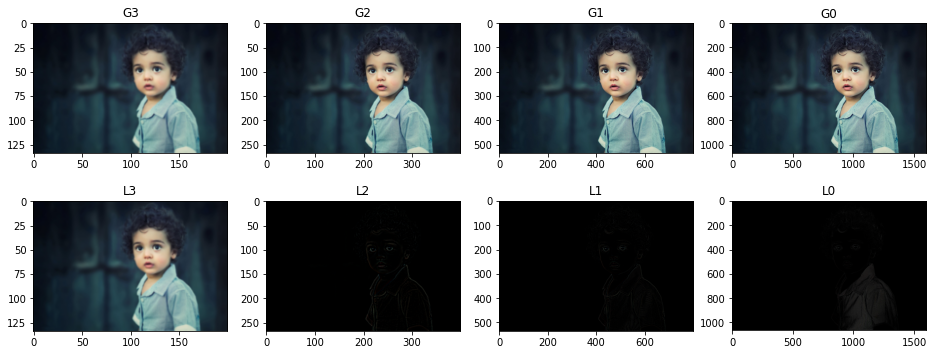

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('child_rgb.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lower = img.copy()

# Create a Gaussian Pyramid
gaussian_pyr = [lower]
for i in range(3):
    lower = cv2.pyrDown(lower)
    gaussian_pyr.append(lower)

# Last level of Gaussian remains same in Laplacian
laplacian_top = gaussian_pyr[-1]

# Create a Laplacian Pyramid
laplacian_pyr = [laplacian_top]
for i in range(3, 0, -1):
    size = (gaussian_pyr[i - 1].shape[1], gaussian_pyr[i - 1].shape[0])
    gaussian_expanded = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
    laplacian = cv2.subtract(gaussian_pyr[i-1], gaussian_expanded)
    laplacian_pyr.append(laplacian)

for i in range(4):
    # Plot Gaussian Pyramid
    plt.subplot(2,4,i+1)
    plt.title('G{}'.format(3-i))
    plt.imshow(gaussian_pyr[3-i])

    # Plot Laplacian Pyramid
    plt.subplot(2,4,i+5)
    plt.title('L{}'.format(3-i))
    plt.imshow(laplacian_pyr[i])

plt.gcf().set_size_inches(16, 6)
plt.show()